# Overview
- Identify what patterns in data will be useful for modeling through visual plotting
- Identify which data is sparse and not necessary in the dataset; this information can be eliminated before moving onto the modeling step
- Identify which data could contribute to the following labels: chance of disease outbreak, proximity to adequate healthcare resources
- Preparing the dataset to merge on the year key if the modeling team would like that (we will have all data segmentations merged for the modeling team as an option)

For each notebook
- General visualizations (scatters, bar)
- Correlations (Heatmaps)
- Distribution graphs (Histograms)
- Geographical maps
- Time Series Analysis
- Z-test for Hypothesis Testing
- Chi-Squared Test for Hypothesis Testing with Categorical Information


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
#import folium
#import geopy
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
combined_dt = pd.read_csv('combined_cases_2018_2019_2024.csv', sep = ',')
indicator_dt = pd.read_csv('disease_indicators.csv', sep=',')

## Combined Cases Dataset

In [6]:
combined_dt.head()

state  year            disease  cases  deaths
0      Al Jazirah  2018  Acute Tonsillitis     16       0
1      Al Qadarif  2018  Acute Tonsillitis     27       0
2       Blue Nile  2018  Acute Tonsillitis     18       0
3  Central Darfur  2018  Acute Tonsillitis      2       0
4     East Darfur  2018  Acute Tonsillitis      2       0

In [7]:
combined_dt.info()
combined_dt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   state    344 non-null    object
 1   year     344 non-null    int64 
 2   disease  344 non-null    object
 3   cases    344 non-null    int64 
 4   deaths   344 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 13.6+ KB


year         cases      deaths
count   344.000000    344.000000  344.000000
mean   2019.238372    221.566860    4.197674
std       2.145205   1134.227938   28.018765
min    2018.000000      0.000000    0.000000
25%    2018.000000      1.000000    0.000000
50%    2018.000000     13.000000    0.000000
75%    2019.000000     43.250000    0.000000
max    2024.000000  11627.000000  317.000000

## Look at combined cases data
Notes:
- looks like Al Jazirah misnamed as 'Aj Jazirah' for 2019, assuming that to be correct & updated CSV file

In [8]:
num_cols = ['year', 'cases', 'deaths']
cat_cols = ['state', 'disease']

## Numerical Distributions

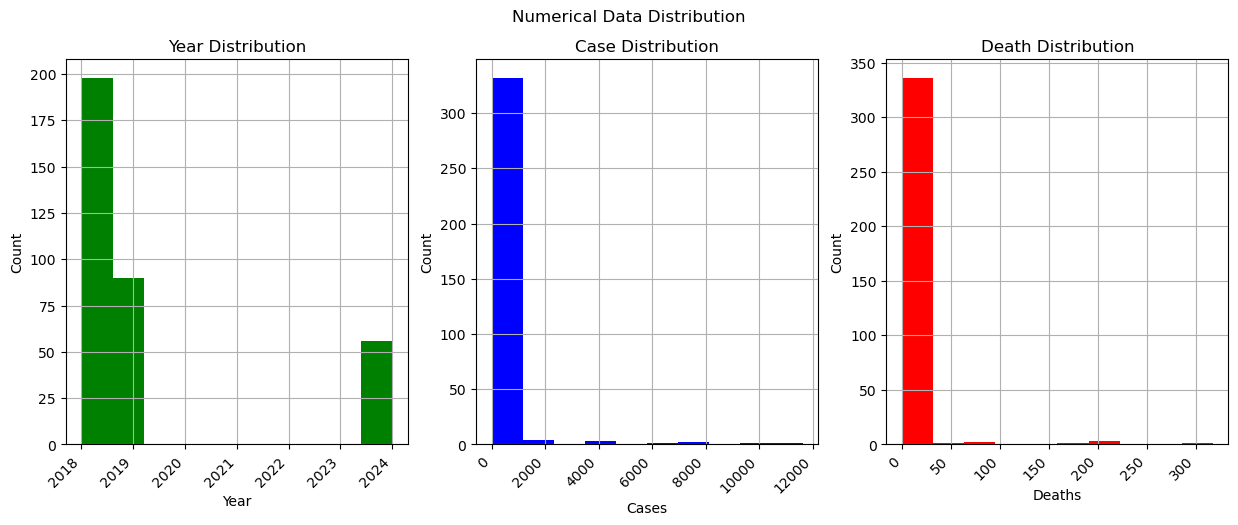

In [12]:
# just want to look at a quick histogram of all the numeric columns and see the distributions
fig, ax = plt.subplots(figsize=(15,5))
plt.suptitle('Numerical Data Distribution')
plt.subplot(1, 3, 1)
plt.hist(combined_dt['year'], color='green')
plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Year Distribution')
plt.grid("on")

plt.subplot(1, 3, 2)
plt.hist(combined_dt['cases'], color='blue')
plt.xlabel('Cases')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Case Distribution')
plt.grid("on")

plt.subplot(1, 3, 3)
plt.hist(combined_dt['deaths'], color='red')
plt.xlabel('Deaths')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Death Distribution')
plt.grid("on")

plt.show();

## Categorical Distributions

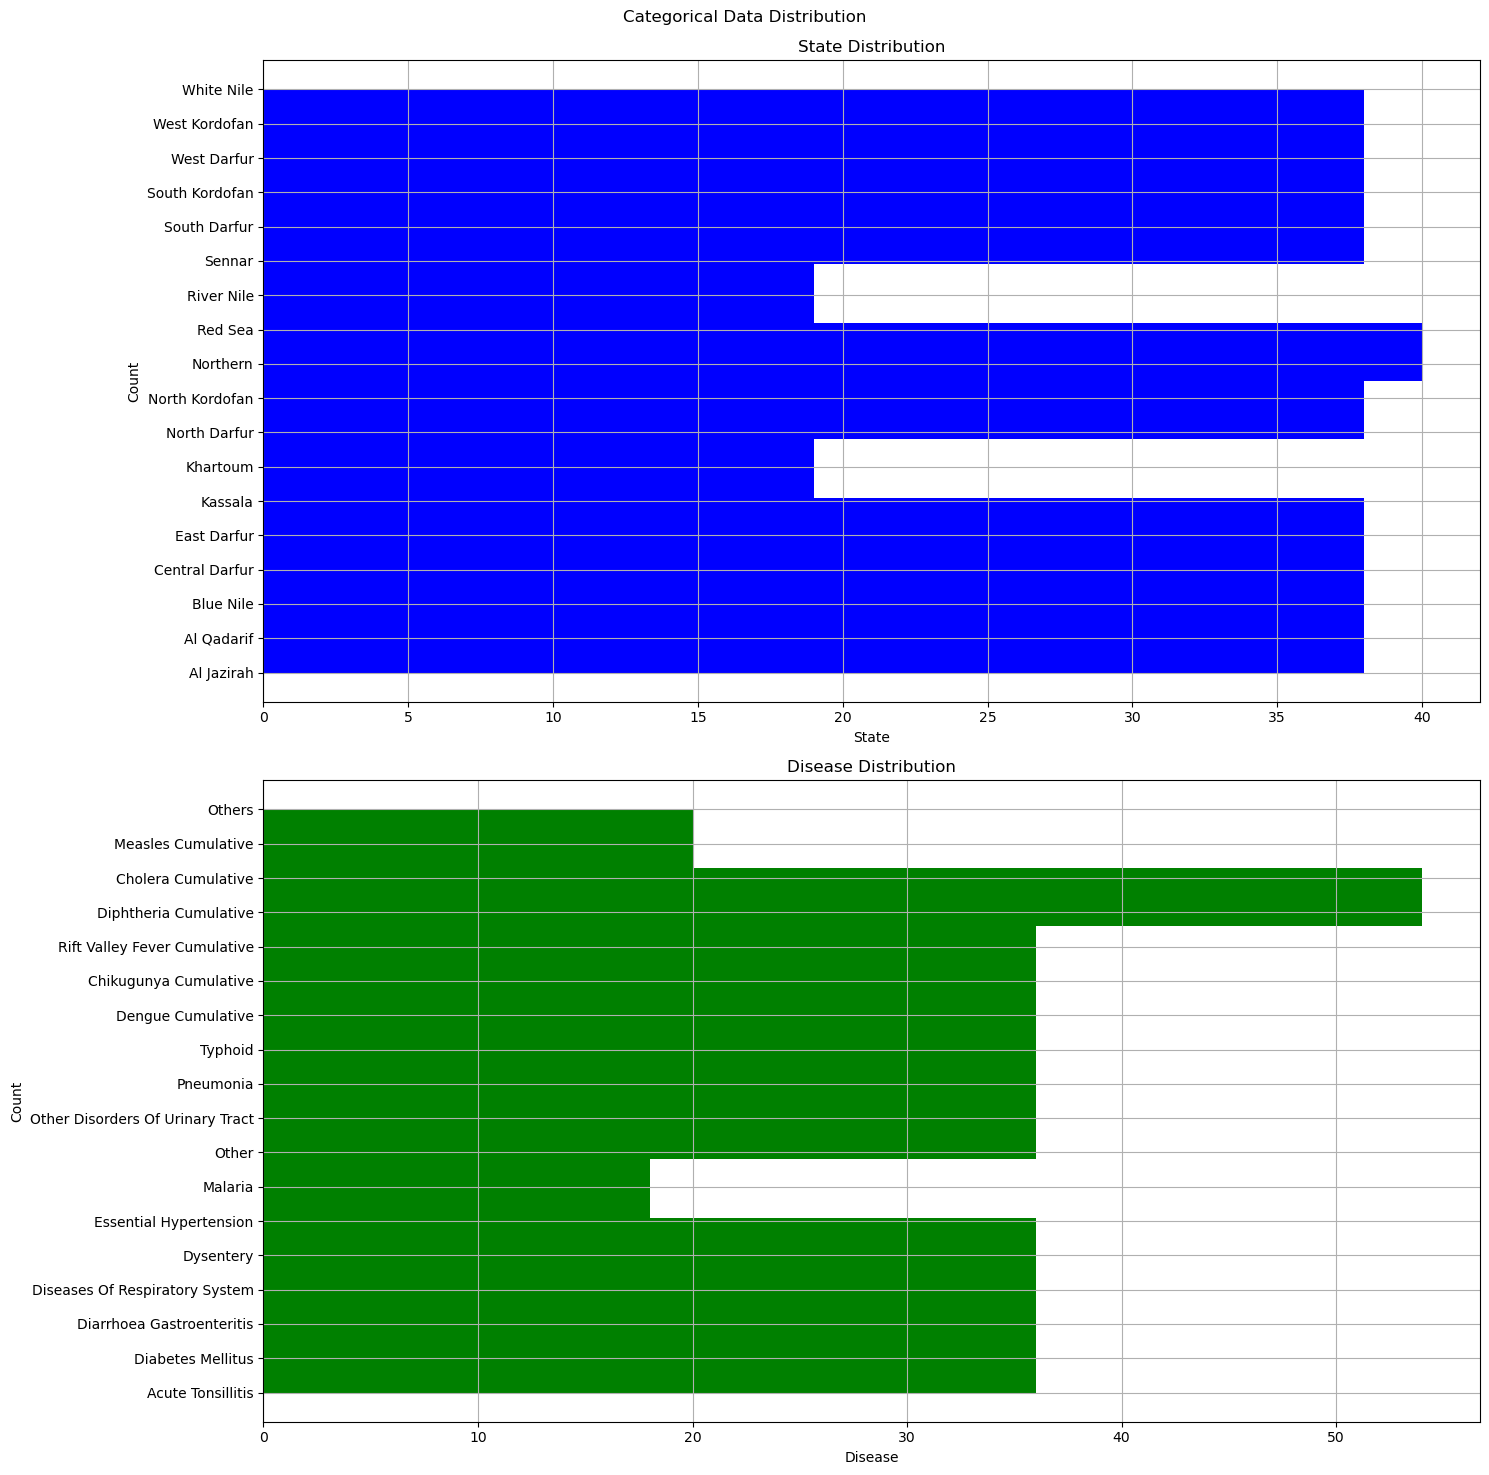

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
plt.suptitle('Categorical Data Distribution')
plt.subplot(2, 1, 1)
plt.hist(combined_dt['state'], color='blue', orientation='horizontal')
plt.xlabel('State')
# plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('State Distribution')
plt.grid("on")

plt.subplot(2, 1, 2)
plt.hist(combined_dt['disease'], color='green', orientation='horizontal')
plt.xlabel('Disease')
# plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Disease Distribution')
plt.grid("on")
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show;

## Numeric Correlations

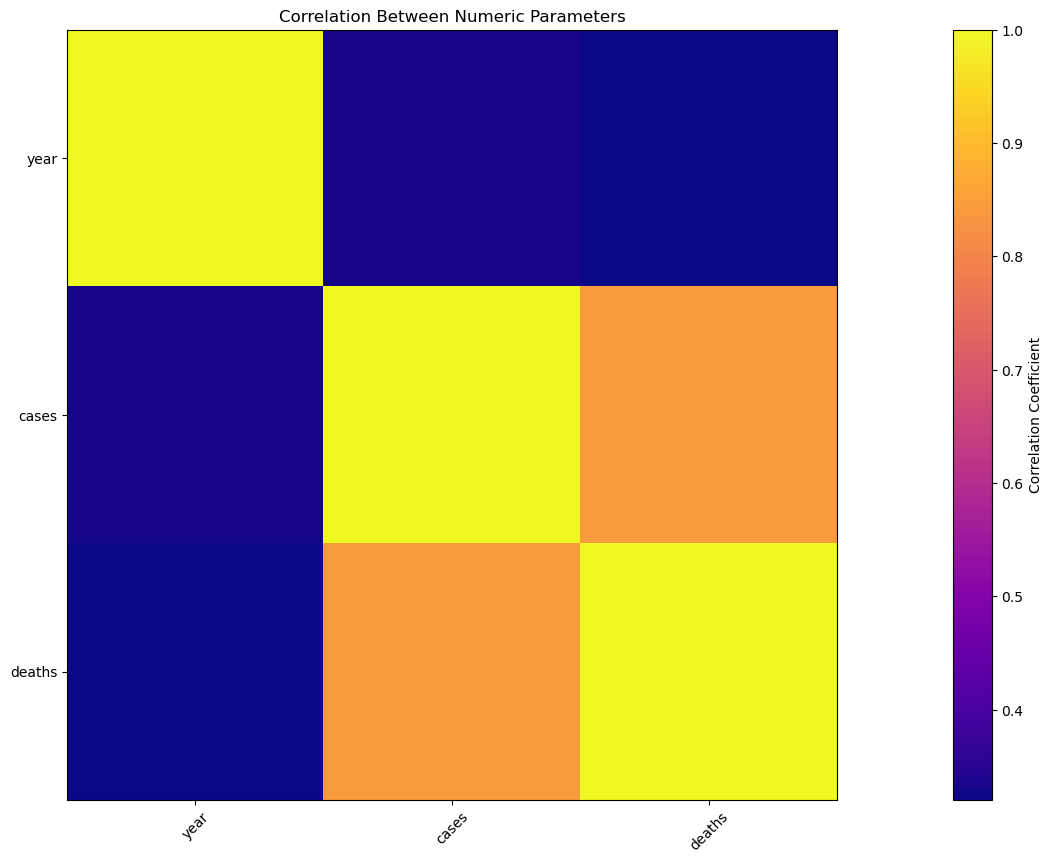

In [13]:
corr_matrix = combined_dt[num_cols].corr()
# visualize correlation matrix so it's easier to figure out what might be related
plt.figure(figsize=(30, 10))
plt.imshow(corr_matrix, cmap='plasma', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Between Numeric Parameters')
plt.show()

## Data by Location

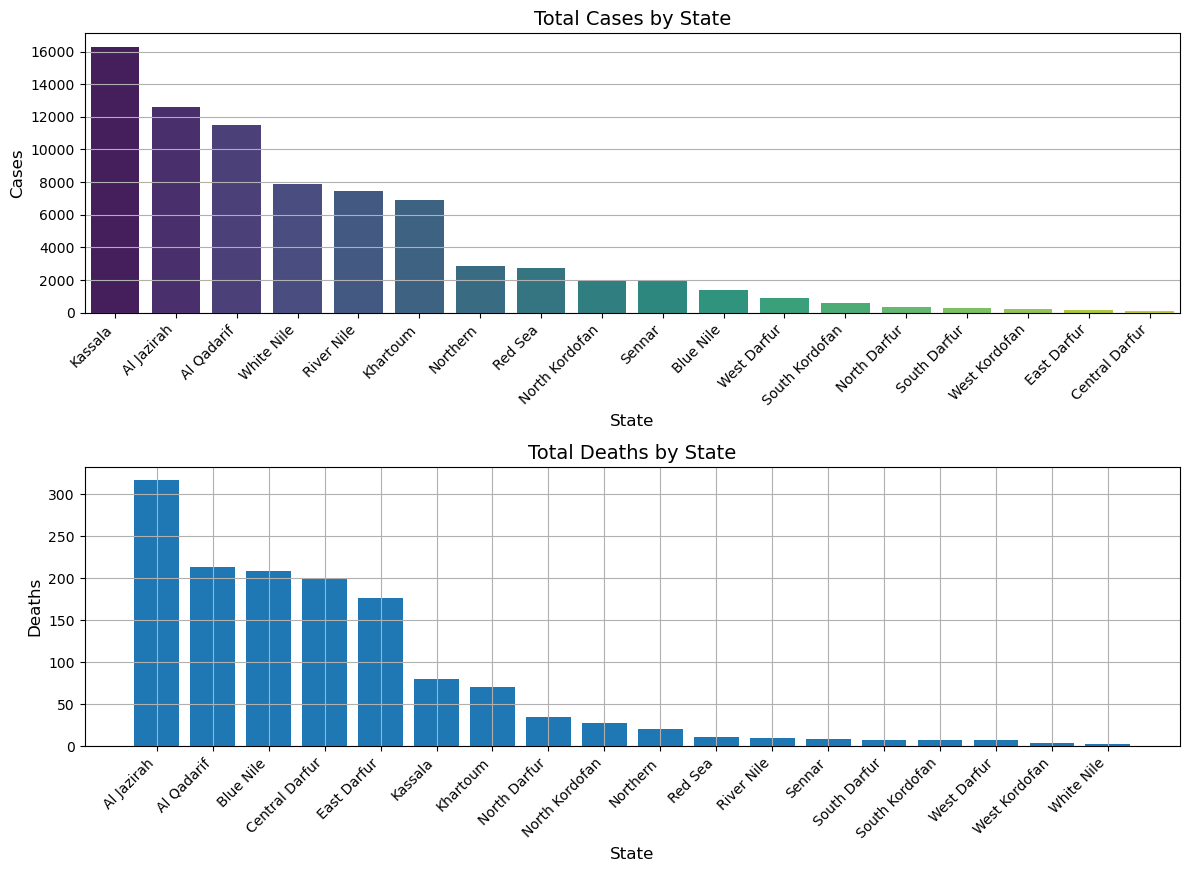

In [14]:
# Aggregate cases by state
cases_by_state = combined_dt.groupby('state')['cases'].sum().reset_index().sort_values(by='cases', ascending=False)
# cases_by_state

# Plot
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.grid('on')
sns.barplot(data=cases_by_state, x='state', y='cases', hue='state', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Total Cases by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Cases', fontsize=12)

plt.subplot(3, 1, 2)
plt.bar(x=combined_dt['state'], height=combined_dt['deaths'].sort_values(ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('Total Deaths by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Deaths', fontsize=12)
plt.grid('on')
plt.tight_layout()
plt.show()

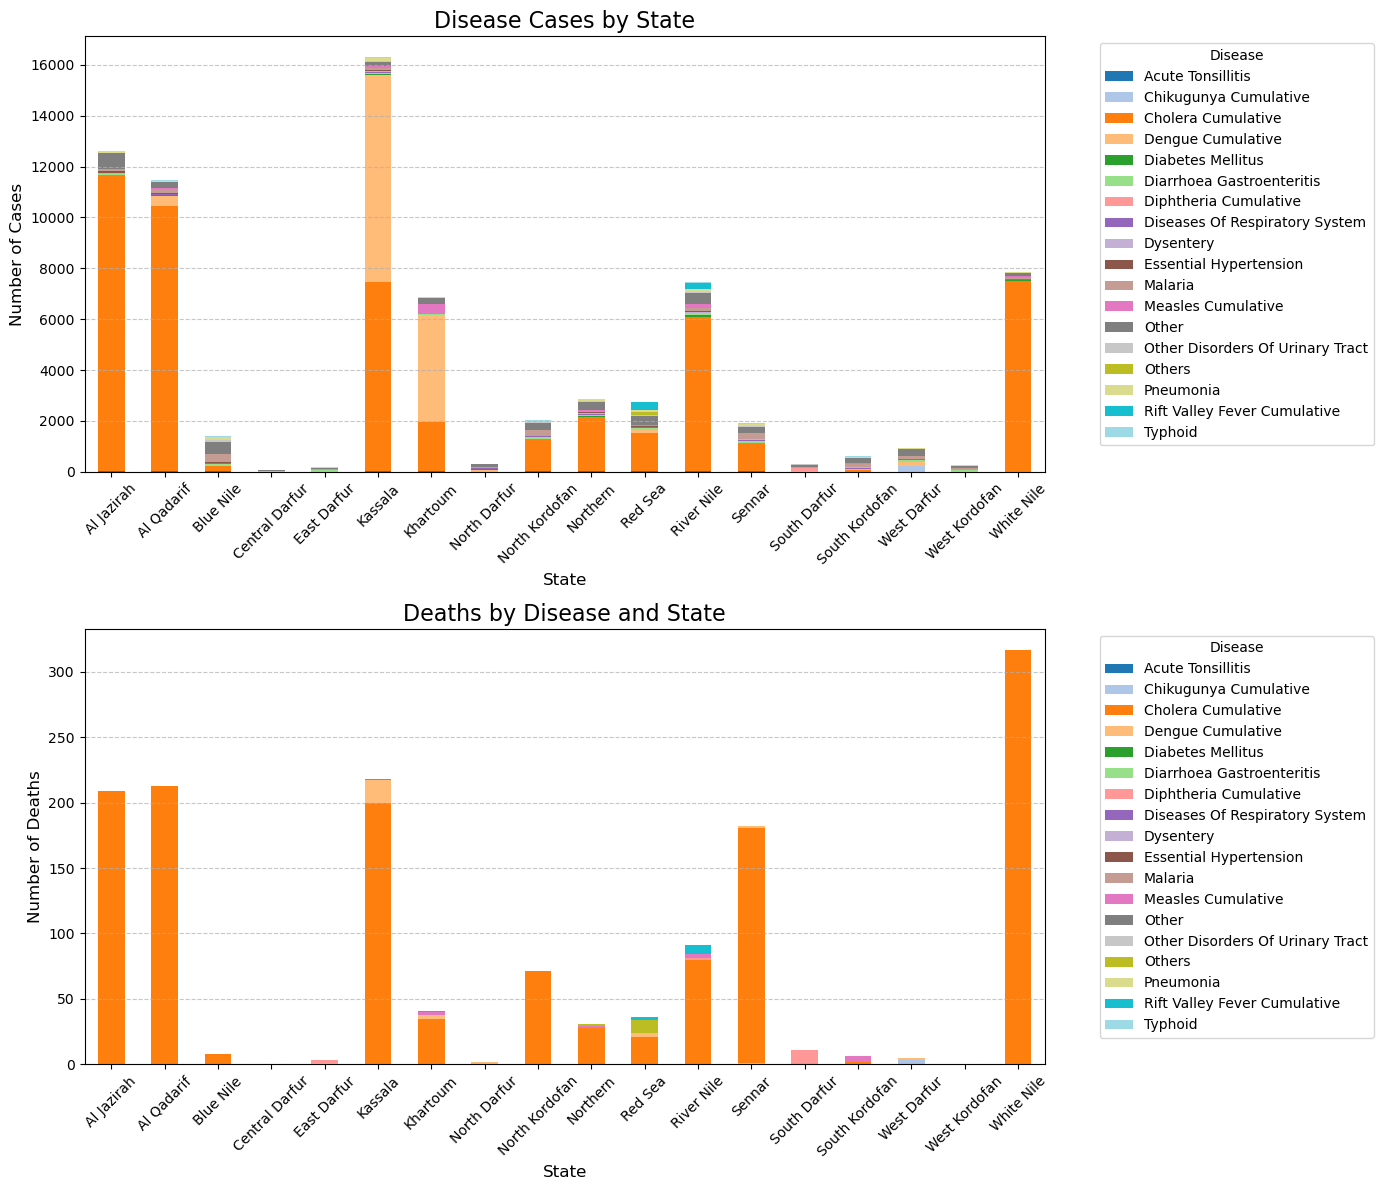

In [15]:
# Grouping by state and disease
disease_state = combined_dt.groupby(['state', 'disease'])['cases'].sum().reset_index()
death_state = combined_dt.groupby(['state', 'disease'])['deaths'].sum().reset_index()

# Create the subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))  # Larger figure size for clarity

# Plotting the first subplot for Disease Cases
pivot_df_disease = disease_state.pivot(index='state', columns='disease', values='cases')
pivot_df_disease.plot(kind='bar', stacked=True, cmap='tab20', ax=axes[0])

axes[0].set_title('Disease Cases by State', fontsize=16)
axes[0].set_ylabel('Number of Cases', fontsize=12)
axes[0].set_xlabel('State', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)

# Plotting the second subplot for Deaths
pivot_df_death = death_state.pivot(index='state', columns='disease', values='deaths')
pivot_df_death.plot(kind='bar', stacked=True, cmap='tab20', ax=axes[1])

axes[1].set_title('Deaths by Disease and State', fontsize=16)
axes[1].set_ylabel('Number of Deaths', fontsize=12)
axes[1].set_xlabel('State', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()


In [23]:
# import state population data
df_pop = pd.read_csv("List_of_Sudanese_states_by_population_1.csv")
df_pop = df_pop.drop(columns="Rank")
print("> df_pop First 5 Rows")
display(df_pop.head())
print("> df_pop Info")
display(df_pop.info())

> df_pop First 5 Rows


Name Population
0        Khartoum  7,993,235
1    South Darfur  5,353,025
2          Gezira  5,096,920
3  North Kordofan  3,174,029
4         Kassala  2,519,071

> df_pop Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        18 non-null     object
 1   Population  18 non-null     object
dtypes: object(2)
memory usage: 416.0+ bytes


None

In [24]:
df_pop["Name"].unique()

array(['Khartoum', 'South Darfur', 'Gezira', 'North Kordofan', 'Kassala',
       'Central Darfur', 'White Nile', 'North Darfur', 'Al Qadarif',
       'South Kordofan', 'Sinnar', 'West Darfur', 'River Nile', 'Red Sea',
       'West Kordofan', 'East Darfur', 'Blue Nile', 'Northern'],
      dtype=object)

In [25]:
df_pop["Name"] = df_pop["Name"].replace('Gezira','Al Jazirah')
df_pop["Name"] = df_pop["Name"].replace('Sinnar','Sennar')
df_pop["Name"].unique()

array(['Khartoum', 'South Darfur', 'Al Jazirah', 'North Kordofan',
       'Kassala', 'Central Darfur', 'White Nile', 'North Darfur',
       'Al Qadarif', 'South Kordofan', 'Sennar', 'West Darfur',
       'River Nile', 'Red Sea', 'West Kordofan', 'East Darfur',
       'Blue Nile', 'Northern'], dtype=object)

In [26]:
df_pop["Population"] = df_pop["Population"].apply(lambda x: "".join(x.split(",")))
df_pop["Population"] = df_pop["Population"].astype(int)
df_pop["Population"]

0     7993235
1     5353025
2     5096920
3     3174029
4     2519071
5     2499000
6     2493880
7     2304950
8     2208385
9     2107623
10    1918692
11    1775945
12    1511442
13    1482053
14    1178537
15    1119451
16    1107623
17     936255
Name: Population, dtype: int32

In [28]:
# total cases/cfr by state
total_by_state = combined_dt.groupby('state')[['cases', 'deaths']].sum().reset_index()
total_by_state["case_fatality_rate"] = total_by_state["deaths"]/total_by_state["cases"]
total_by_state

state  cases  deaths  case_fatality_rate
0       Al Jazirah  12603     209            0.016583
1       Al Qadarif  11470     213            0.018570
2        Blue Nile   1401       8            0.005710
3   Central Darfur     81       0            0.000000
4      East Darfur    176       3            0.017045
5          Kassala  16304     218            0.013371
6         Khartoum   6879      41            0.005960
7     North Darfur    326       2            0.006135
8   North Kordofan   2024      71            0.035079
9         Northern   2858      31            0.010847
10         Red Sea   2746      36            0.013110
11      River Nile   7457      91            0.012203
12          Sennar   1924     182            0.094595
13    South Darfur    303      11            0.036304
14  South Kordofan    607       6            0.009885
15     West Darfur    929       5            0.005382
16   West Kordofan    260       0            0.000000
17      White Nile   7871     317            0.040274

In [29]:
# total cases/cfr by disease
total_by_disease = combined_dt.groupby('disease')[['cases', 'deaths']].sum().reset_index()
total_by_disease["case_fatality_rate"] = total_by_disease["deaths"]/total_by_disease["cases"]
total_by_disease

disease  cases  deaths  case_fatality_rate
0                  Acute Tonsillitis    319       0            0.000000
1              Chikugunya Cumulative    308       5            0.016234
2                 Cholera Cumulative  51234    1364            0.026623
3                  Dengue Cumulative  13088      28            0.002139
4                  Diabetes Mellitus    300       0            0.000000
5          Diarrhoea Gastroenteritis    720       0            0.000000
6              Diphtheria Cumulative    105      14            0.133333
7     Diseases Of Respiratory System    439       0            0.000000
8                          Dysentery    252       0            0.000000
9             Essential Hypertension    372       0            0.000000
10                           Malaria   1752       0            0.000000
11                Measles Cumulative    798      10            0.012531
12                             Other   4263       0            0.000000
13  Other Disorders Of Urinary Tract    387       0            0.000000
14                            Others    153      12            0.078431
15                         Pneumonia    924       0            0.000000
16      Rift Valley Fever Cumulative    576      11            0.019097
17                           Typhoid    229       0            0.000000

In [34]:
# prevalence by state (# infected at any point in time - take average cases instead of total - prevalence per year)
# https://en.wikipedia.org/wiki/Prevalence
mean_by_state = combined_dt.groupby(['state'])[['cases', 'deaths']].mean().reset_index()
prevalence_by_state = pd.merge(mean_by_state, df_pop, how="left", left_on="state", right_on="Name")
prevalence_by_state = prevalence_by_state.drop(columns="Name")
prevalence_by_state["prevalence"] = prevalence_by_state["cases"]/prevalence_by_state["Population"]
prevalence_by_state["death_rate"] = (prevalence_by_state['deaths']/prevalence_by_state["Population"])
prevalence_by_state

state       cases     deaths  Population  prevalence  \
0       Al Jazirah  663.315789  11.000000     5096920    0.000130   
1       Al Qadarif  603.684211  11.210526     2208385    0.000273   
2        Blue Nile   73.736842   0.421053     1107623    0.000067   
3   Central Darfur    4.263158   0.000000     2499000    0.000002   
4      East Darfur    9.263158   0.157895     1119451    0.000008   
5          Kassala  858.105263  11.473684     2519071    0.000341   
6         Khartoum  362.052632   2.157895     7993235    0.000045   
7     North Darfur   17.157895   0.105263     2304950    0.000007   
8   North Kordofan  106.526316   3.736842     3174029    0.000034   
9         Northern  142.900000   1.550000      936255    0.000153   
10         Red Sea  137.300000   1.800000     1482053    0.000093   
11      River Nile  392.473684   4.789474     1511442    0.000260   
12          Sennar  101.263158   9.578947     1918692    0.000053   
13    South Darfur   15.947368   0.578947     5353025    0.000003   
14  South Kordofan   31.947368   0.315789     2107623    0.000015   
15     West Darfur   48.894737   0.263158     1775945    0.000028   
16   West Kordofan   13.684211   0.000000     1178537    0.000012   
17      White Nile  414.263158  16.684211     2493880    0.000166   

      death_rate  
0   2.158166e-06  
1   5.076346e-06  
2   3.801407e-07  
3   0.000000e+00  
4   1.410466e-07  
5   4.554728e-06  
6   2.699651e-07  
7   4.566830e-08  
8   1.177318e-06  
9   1.655532e-06  
10  1.214531e-06  
11  3.168811e-06  
12  4.992436e-06  
13  1.081533e-07  
14  1.498320e-07  
15  1.481791e-07  
16  0.000000e+00  
17  6.690061e-06

In [36]:
# total cases by state
total_by_state = total_by_state.sort_values(by="cases")
fig = px.bar(total_by_state, x="cases", y="state", orientation='h',
             hover_data=["state", "cases"],
             title='total cases by state')
fig.show()

In [37]:
# case fatality rate by state
total_by_state = total_by_state.sort_values(by="case_fatality_rate")
fig = px.bar(total_by_state, x="case_fatality_rate", y="state", orientation='h',
             hover_data=["state", "cases", "deaths", "case_fatality_rate"],
             title='total case_fatality_rate by state')
fig.show()

In [38]:
# total cases by disease
total_by_disease = total_by_disease.sort_values(by="cases")
fig = px.bar(total_by_disease, x="cases", y="disease", orientation='h',
             hover_data=["disease", "cases"],
             title='total cases by disease')
fig.show()

In [39]:
# total deaths by disease
total_by_disease = total_by_disease.sort_values(by="deaths")
fig = px.bar(total_by_disease, x="deaths", y="disease", orientation='h',
             hover_data=["disease", "deaths"],
             title='total deaths by disease')
fig.show()

In [41]:
# case fatality rate by disease
total_by_disease = total_by_disease.sort_values(by="case_fatality_rate")
fig = px.bar(total_by_disease, x="case_fatality_rate", y="disease", orientation='h',
             hover_data=["disease", "cases", "deaths", "case_fatality_rate"],
             title='case fatality rate by state')
fig.show()

In [42]:
# prevalence by state
prevalence_by_state = prevalence_by_state.sort_values(by="prevalence")
fig = px.bar(prevalence_by_state, x="prevalence", y="state", orientation='h',
             hover_data=["state", "prevalence"],
             title='')
fig.show()

In [43]:
# death rate by state
prevalence_by_state = prevalence_by_state.sort_values(by="death_rate")
fig = px.bar(prevalence_by_state, x="death_rate", y="state", orientation='h',
             hover_data=["state", "death_rate"],
             title='')
fig.show()

In [44]:
# state population
df_pop = df_pop .sort_values(by="Population")
fig = px.bar(df_pop , x="Population", y="Name", orientation='h',
             hover_data=["Name", "Population"],
             title='')
fig.show()

### Trend Analysis

   year  cases  deaths
0  2018   9957       0
1  2019   5571      54
2  2024  60691    1390


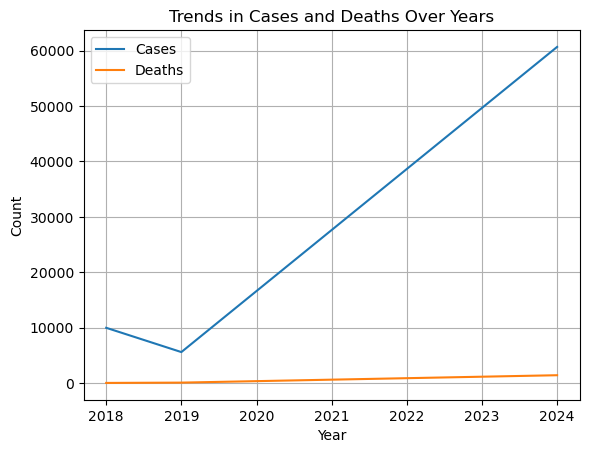

In [16]:
#cases and deaths that occurred yearly
yearly_trends = combined_dt.groupby('year')[['cases','deaths']].sum().reset_index()
print(yearly_trends)

#plotting trends in deaths and case over the years
plt.plot(yearly_trends['year'], yearly_trends['cases'],label='Cases')
plt.plot(yearly_trends['year'], yearly_trends['deaths'],label='Deaths')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trends in Cases and Deaths Over Years')
plt.legend()
plt.grid()
plt.show();

#### There were no data from 2020 to 2023. 2024 had the most cases and subsequently the most deaths

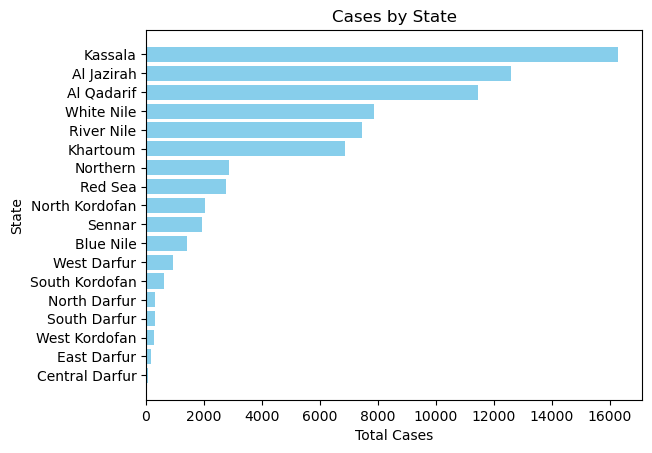

In [17]:
#grouping cases and deaths by states
state_analysis = combined_dt.groupby('state')[['cases', 'deaths']].sum().reset_index()

# Plotting cases by state
state_analysis = state_analysis.sort_values(by='cases', ascending=True)
plt.barh(state_analysis['state'], state_analysis['cases'], color='skyblue')
plt.xlabel('Total Cases')
plt.ylabel('State')
plt.title('Cases by State')
plt.show()

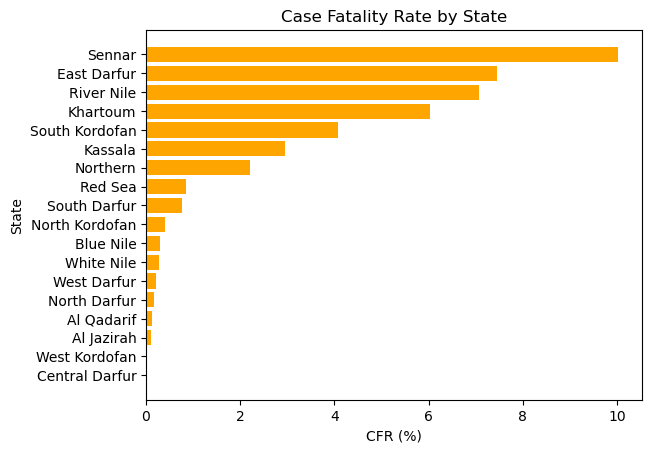

In [19]:
# did a little feature engineering to determine case fatality rate i.e deaths/cases * 100
combined_dt['CFR'] = (combined_dt['deaths'] / combined_dt['cases']) * 100

#cfr by states
state_cfr = combined_dt.groupby('state')['CFR'].mean().reset_index()

#visualizing it
state_cfr = state_cfr.sort_values(by='CFR', ascending=True)
plt.barh(state_cfr['state'], state_cfr['CFR'], color='orange')
plt.xlabel('CFR (%)')
plt.ylabel('State')
plt.title('Case Fatality Rate by State');

#### Sennar had the highest case fatality rate in the state at roughly 10%

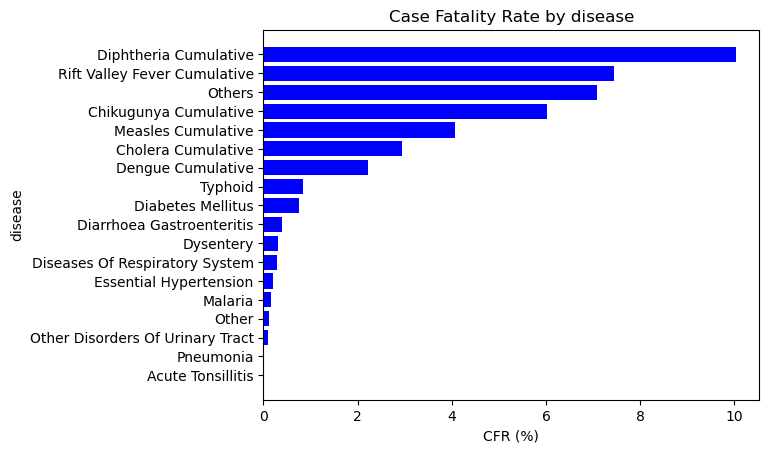

In [20]:
#diseases with the fatality rate
disease_cfr = combined_dt.groupby('disease')['CFR'].mean().reset_index()

#visualizing it
disease_cfr = disease_cfr.sort_values(by='CFR', ascending=True)
plt.barh(disease_cfr['disease'], state_cfr['CFR'], color='blue')
plt.xlabel('CFR (%)')
plt.ylabel('disease')
plt.title('Case Fatality Rate by disease');

#### Diphteria Cumulative had the highest case fatality rate while Acute Tonsilitis had the least

### Indicator dataset

In [21]:
indicator_dt.head()

GHO (CODE)  YEAR (DISPLAY)  STARTYEAR  ENDYEAR DIMENSION (TYPE)  \
0     MALARIA_CONF_CASES            2020       2020     2020              NaN   
1  MALARIA_EST_MORTALITY            2021       2021     2021              NaN   
2  MALARIA_EST_MORTALITY            2014       2014     2014              NaN   
3       MALARIA_SUSPECTS            2017       2017     2017              NaN   
4  MALARIA_EST_MORTALITY            2012       2012     2012              NaN   

  DIMENSION (CODE) DIMENSION (NAME)     Numeric   Low   High  
0              NaN              NaN  1698394.00  0.00   0.00  
1              NaN              NaN       16.19  5.75  34.16  
2              NaN              NaN        9.01  3.88  15.78  
3              NaN              NaN  3691112.00  0.00   0.00  
4              NaN              NaN        7.71  3.36  13.28

In [22]:
indicator_dt.describe()

YEAR (DISPLAY)    STARTYEAR      ENDYEAR       Numeric           Low  \
count     4965.000000  4965.000000  4965.000000  4.654000e+03   4965.000000   
mean      2006.855388  2006.852568  2006.855388  5.580419e+04   1039.507994   
std         11.171563    11.168623    11.171563  4.520914e+05   5406.402223   
min       1961.000000  1961.000000  1961.000000  0.000000e+00      0.000000   
25%       2000.000000  2000.000000  2000.000000  2.900000e+00      0.100000   
50%       2009.000000  2009.000000  2009.000000  1.135000e+01      3.600000   
75%       2016.000000  2016.000000  2016.000000  2.946750e+01     11.930000   
max       2024.000000  2024.000000  2024.000000  9.760505e+06  70537.800000   

                High  
count    4965.000000  
mean     3327.646731  
std     17710.843512  
min         0.000000  
25%         0.360000  
50%        10.020000  
75%        25.780000  
max    223150.900000

###  Conclusions

1. State Population data was imported to help with analysis

2. Kassala has the most cases

3. White Nile has the most deaths

4. Kassala has the highest prevalence of diseases (most diseases per capita)

5. White Nile has the highest death rates (most deaths per capita)

6. Both Kassala and White Nile have average populations but the some of the highest % of people affected by diseases

7. While more poeple in Kassala are affected by these diseases, more people die from diseases in White Nile

8. Al Qadarif has both a high prevalence and a high mortality rate (#2 for both).